In [1]:
from pdfparser import Parser
import pdfplumber
from pdfplumber.page import Page
from pdfplumber.table import Table
from typing import List, Dict


In [2]:
parser=Parser('test.PDF')

Msg from find_header: 页眉为'2021年年度报告'
Msg from find_toc: 在第4页找到目录


find_headline 该方法，用于获取标题
# 现有问题
    通过字体大小和字体类型目前无法有效获取标题
# 可能的方案
    1· 通过正则查询（可能无法有效提取）
    2· 通过位置提取

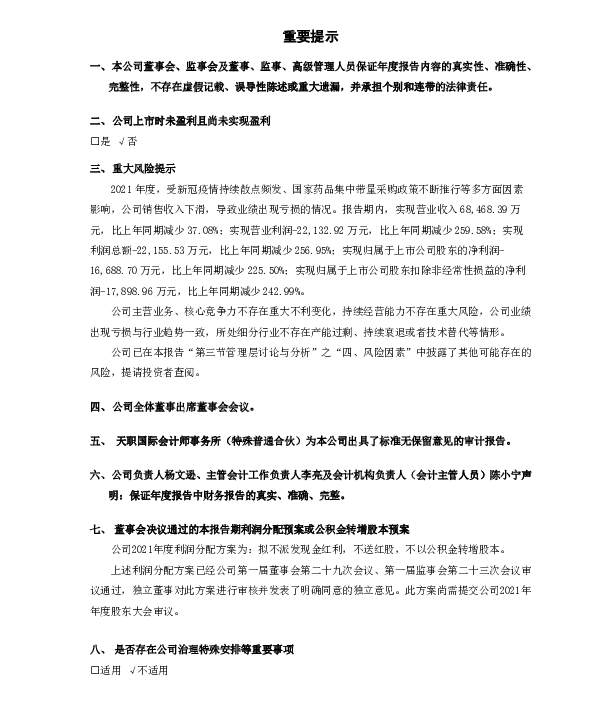

'重要提示 \n一、 本公司董事会、监事会及董事、监事、高级管理人员保证年度报告内容的真实性、准确性、\n完整性，不存在虚假记载、误导性陈述或重大遗漏，并承担个别和连带的法律责任。 \n \n二、 公司上市时未盈利且尚未实现盈利 \n□是 √否  \n \n三、 重大风险提示 \n2021年度，受新冠疫情持续散点频发、国家药品集中带量采购政策不断推行等多方面因素\n影响，公司销售收入下滑，导致业绩出现亏损的情况。报告期内，实现营业收入68,468.39万\n元，比上年同期减少37.08%；实现营业利润-22,132.92万元，比上年同期减少259.58%；实现\n利润总额-22,155.53万元，比上年同期减少256.95%；实现归属于上市公司股东的净利润-\n16,688.70万元，比上年同期减少225.50%；实现归属于上市公司股东扣除非经常性损益的净利\n润-17,898.96万元，比上年同期减少242.99%。 \n公司主营业务、核心竞争力不存在重大不利变化，持续经营能力不存在重大风险，公司业绩\n出现亏损与行业趋势一致，所处细分行业不存在产能过剩、持续衰退或者技术替代等情形。 \n公司已在本报告“第三节管理层讨论与分析”之“四、风险因素”中披露了其他可能存在的\n风险，提请投资者查阅。 \n \n四、 公司全体董事出席董事会会议。 \n \n五、 天职国际会计师事务所（特殊普通合伙）为本公司出具了标准无保留意见的审计报告。 \n \n六、 公司负责人杨文逊、主管会计工作负责人李亮及会计机构负责人（会计主管人员）陈小宁声\n明：保证年度报告中财务报告的真实、准确、完整。 \n \n七、 董事会决议通过的本报告期利润分配预案或公积金转增股本预案 \n公司2021年度利润分配方案为：拟不派发现金红利，不送红股，不以公积金转增股本。 \n上述利润分配方案已经公司第一届董事会第二十九次会议、第一届监事会第二十三次会议审\n议通过，独立董事对此方案进行审核并发表了明确同意的独立意见。此方案尚需提交公司2021年\n年度股东大会审议。 \n \n八、 是否存在公司治理特殊安排等重要事项 \n□适用 √不适用  \n '

In [5]:
def find_headline(self:Parser):
    font_size_dict:Dict[str,List[int]]={}
    last_adv=None
    for page in self.cropped_tables:
        for char in page.chars:
            if char['adv'] not in font_size_dict:
                font_size_dict[char['adv']]=[]
            if last_adv!=char['adv']:
                font_size_dict[char['adv']].append('')
            font_size_dict[char['adv']][-1]+=char['text']
            last_adv=char['adv']
    print(font_size_dict[11.04])
print()
page=parser.cropped_tables[1]
im=page.to_image()
im.show()
page.extract_text()


1，部份表格没有具体标题，需要提取的表格是否一定存在一个具体的标题
2，标题名称是否固定

dict_keys([10.56, 5.28, 21.96, 10.98, 14.04, 7.02, 2.9356800000000005, 2.3865600000000002, 2.64, 6.0, 3.17304, 3.2947200000000003, 5.871360000000001, 4.98, 5.3539200000000005, 2.8195200000000002, 2.3232, 11.04, 5.52, 9.38784, 6.1048800000000005, 12.0, 6.672000000000001, 3.3360000000000003, 9.0, 4.5, 4.5408, 2.66112, 9.96, 2.7688800000000007, 2.1912000000000003])